In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read in the data
df = pd.read_csv('japan_birth.csv')
df.tail()

,Unnamed: 0,year,birth_total,birth_male,birth_female,birth_rate,birth_gender_ratio,total_fertility_rate,population_total,population_male,...,mother_age_30-34,mother_age_35-39,mother_age_40-44,mother_age_over_45,father_age_avg,father_age_firstborn,father_age_secondborn,father_age_thirdborn,legitimate_child,illegitimate_child
119,119,2018,918400.0,470851.0,447549.0,7.4,105.2,1.42,124218285,60454898,...,334906.0,211021.0,51258.0,1659.0,34.0,32.8,34.6,35.6,897359.0,21041.0
120,120,2019,865239.0,443430.0,421809.0,7.0,105.1,1.36,123731176,60208034,...,312582.0,201010.0,49191.0,1649.0,34.0,32.8,34.7,35.7,845068.0,20171.0
121,121,2020,840835.0,430713.0,410122.0,6.8,105.0,1.33,123398962,60002838,...,303436.0,196321.0,47899.0,1676.0,34.1,32.8,34.7,35.8,820795.0,20040.0
122,122,2021,811622.0,415903.0,395719.0,6.6,105.1,1.30,122780487,59686643,...,292439.0,193177.0,48517.0,1617.0,34.2,32.9,34.8,35.9,793020.0,18602.0
123,123,2022,770759.0,395257.0,375502.0,6.3,105.3,1.26,122030523,59313678,...,279517.0,183327.0,46338.0,1658.0,34.2,32.9,34.8,36.0,753031.0,17728.0


In [11]:
gdp_df = pd.read_csv('/Users/jevan/Documents/data_science/japan_births/API_NY.GDP.MKTP.CD_DS2_en_csv_v2_6298258/API_NY.GDP.MKTP.CD_DS2_en_csv_v2_6298258.csv', skiprows=4)
gdp_df = gdp_df[gdp_df['Country Name'] == 'Japan'].T.reset_index()[4:-1]
gdp_df

,index,119
4,1960,44307342950.400002
5,1961,53508617739.3778
6,1962,60723018683.733299
7,1963,69498131797.333298
8,1964,81749006381.511093
...,...,...
62,2018,5040880939324.860352
63,2019,5117993853016.509766
64,2020,5048789595589.429688
65,2021,5005536736792.290039


In [16]:
gdp_df['index'] = pd.to_datetime(gdp_df['index'], format='%Y')
gdp_df['index'] = gdp_df['index'].dt.year

df['year'] = pd.to_datetime(df['year'], format='%Y')
df['year'] = df['year'].dt.year


In [19]:
merged_df = pd.merge(df, gdp_df, left_on='year', right_on='index', how='outer')
merged_df = merged_df[merged_df['year'] >= 1922]
merged_df

,Unnamed: 0,year,birth_total,birth_male,birth_female,birth_rate,birth_gender_ratio,total_fertility_rate,population_total,population_male,...,mother_age_40-44,mother_age_over_45,father_age_avg,father_age_firstborn,father_age_secondborn,father_age_thirdborn,legitimate_child,illegitimate_child,index,119
23,23,1922,1969314.0,1004022.0,965292.0,34.3,104.0,NaN,57390100,28799700,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,24,1923,2043297.0,1043599.0,999698.0,35.2,104.4,NaN,58119200,29176900,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,25,1924,1998520.0,1019988.0,978532.0,33.9,104.2,NaN,58875600,29568700,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,26,1925,2086091.0,1060827.0,1025264.0,34.9,103.5,NaN,59736822,30013109,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,27,1926,2104405.0,1081793.0,1022611.0,34.6,105.8,NaN,60740900,30521300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,119,2018,918400.0,470851.0,447549.0,7.4,105.2,1.42,124218285,60454898,...,51258.0,1659.0,34.0,32.8,34.6,35.6,897359.0,21041.0,2018.0,5040880939324.860352
120,120,2019,865239.0,443430.0,421809.0,7.0,105.1,1.36,123731176,60208034,...,49191.0,1649.0,34.0,32.8,34.7,35.7,845068.0,20171.0,2019.0,5117993853016.509766
121,121,2020,840835.0,430713.0,410122.0,6.8,105.0,1.33,123398962,60002838,...,47899.0,1676.0,34.1,32.8,34.7,35.8,820795.0,20040.0,2020.0,5048789595589.429688
122,122,2021,811622.0,415903.0,395719.0,6.6,105.1,1.30,122780487,59686643,...,48517.0,1617.0,34.2,32.9,34.8,35.9,793020.0,18602.0,2021.0,5005536736792.290039


In [23]:
merged_df.drop(columns=['index', 'Unnamed: 0'], inplace=True)
merged_df.rename(columns={merged_df.columns[-1]: 'gdp'}, inplace=True)

merged_df


,year,birth_total,birth_male,birth_female,birth_rate,birth_gender_ratio,total_fertility_rate,population_total,population_male,population_female,...,mother_age_35-39,mother_age_40-44,mother_age_over_45,father_age_avg,father_age_firstborn,father_age_secondborn,father_age_thirdborn,legitimate_child,illegitimate_child,119
23,1922,1969314.0,1004022.0,965292.0,34.3,104.0,NaN,57390100,28799700,28590300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,1923,2043297.0,1043599.0,999698.0,35.2,104.4,NaN,58119200,29176900,28942300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,1924,1998520.0,1019988.0,978532.0,33.9,104.2,NaN,58875600,29568700,29306900,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,1925,2086091.0,1060827.0,1025264.0,34.9,103.5,NaN,59736822,30013109,29723713,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,1926,2104405.0,1081793.0,1022611.0,34.6,105.8,NaN,60740900,30521300,30219600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,2018,918400.0,470851.0,447549.0,7.4,105.2,1.42,124218285,60454898,63763387,...,211021.0,51258.0,1659.0,34.0,32.8,34.6,35.6,897359.0,21041.0,5040880939324.860352
120,2019,865239.0,443430.0,421809.0,7.0,105.1,1.36,123731176,60208034,63523142,...,201010.0,49191.0,1649.0,34.0,32.8,34.7,35.7,845068.0,20171.0,5117993853016.509766
121,2020,840835.0,430713.0,410122.0,6.8,105.0,1.33,123398962,60002838,63396124,...,196321.0,47899.0,1676.0,34.1,32.8,34.7,35.8,820795.0,20040.0,5048789595589.429688
122,2021,811622.0,415903.0,395719.0,6.6,105.1,1.30,122780487,59686643,63093844,...,193177.0,48517.0,1617.0,34.2,32.9,34.8,35.9,793020.0,18602.0,5005536736792.290039


In [25]:
merged_df.rename(columns={merged_df.columns[-1]: 'gdp'}, inplace=True)

In [26]:
merged_df.columns

Index(['year', 'birth_total', 'birth_male', 'birth_female', 'birth_rate',
       'birth_gender_ratio', 'total_fertility_rate', 'population_total',
       'population_male', 'population_female', 'infant_death_total',
       'infant_death_male', 'infant_death_female',
       'infant_death_unknown_gender', 'infant_death_rate',
       'infant_death_gender_ratio', 'infant_deaths_in_total_deaths',
       'stillbirth_total', 'stillbirth_male', 'stillbirth_female',
       'stillbirth_unknown_gender', 'stillbirth_rate',
       'stillbirth_gender_ratio', 'firstborn', 'secondborn', 'thirdborn',
       'forthborn', 'fifthborn_and_above', 'weeks_under_28', 'weeks_28-31',
       'weeks_32-36', 'weeks_37-41', 'weeks_over_42', 'mother_age_avg',
       'mother_age_firstborn', 'mother_age_secondborn', 'mother_age_thirdborn',
       'mother_age_under_19', 'mother_age_20-24', 'mother_age_25-29',
       'mother_age_30-34', 'mother_age_35-39', 'mother_age_40-44',
       'mother_age_over_45', 'father_age_avg

In [27]:
pd.set_option('display.max_columns', None)

merged_df['gdp_growth_rate'] = merged_df['gdp'].pct_change() * 100

merged_df['firstborn_ratio'] = merged_df['firstborn'] / merged_df['birth_total']
merged_df['secondborn_ratio'] = merged_df['secondborn'] / merged_df['birth_total']
merged_df['thirdborn_ratio'] = merged_df['thirdborn'] / merged_df['birth_total']
merged_df['forthborn_ratio'] = merged_df['forthborn'] / merged_df['birth_total']
merged_df['fifthborn_plus_ratio'] = merged_df['fifthborn_and_above'] / merged_df['birth_total']



merged_df['parental_age_diff'] = merged_df['father_age_avg'] - merged_df['mother_age_avg']


merged_df['early_term_births_ratio'] = merged_df[['weeks_under_28', 'weeks_28-31', 'weeks_32-36']].sum(axis=1) / merged_df['birth_total']
merged_df['late_term_births_ratio'] = merged_df['weeks_over_42'] / merged_df['birth_total']


age_groups = ['mother_age_under_19', 'mother_age_20-24', 'mother_age_25-29', 
              'mother_age_30-34', 'mother_age_35-39', 'mother_age_40-44', 'mother_age_over_45']
for age_group in age_groups:
    merged_df[f'{age_group}_prop'] = merged_df[age_group] / merged_df['birth_total']


merged_df['infant_mortality_to_stillbirth_ratio'] = merged_df['infant_death_total'] / merged_df['stillbirth_total']


merged_df['legitimacy_rate'] = merged_df['legitimate_child'] / merged_df['birth_total']

merged_df['gender_disparity_births'] = merged_df['birth_male'] - merged_df['birth_female']
merged_df['gender_disparity_deaths'] = merged_df['infant_death_male'] - merged_df['infant_death_female']

merged_df

,year,birth_total,birth_male,birth_female,birth_rate,birth_gender_ratio,total_fertility_rate,population_total,population_male,population_female,infant_death_total,infant_death_male,infant_death_female,infant_death_unknown_gender,infant_death_rate,infant_death_gender_ratio,infant_deaths_in_total_deaths,stillbirth_total,stillbirth_male,stillbirth_female,stillbirth_unknown_gender,stillbirth_rate,stillbirth_gender_ratio,firstborn,secondborn,thirdborn,forthborn,fifthborn_and_above,weeks_under_28,weeks_28-31,weeks_32-36,weeks_37-41,weeks_over_42,mother_age_avg,mother_age_firstborn,mother_age_secondborn,mother_age_thirdborn,mother_age_under_19,mother_age_20-24,mother_age_25-29,mother_age_30-34,mother_age_35-39,mother_age_40-44,mother_age_over_45,father_age_avg,father_age_firstborn,father_age_secondborn,father_age_thirdborn,legitimate_child,illegitimate_child,gdp,gdp_growth_rate,firstborn_ratio,secondborn_ratio,thirdborn_ratio,forthborn_ratio,fifthborn_plus_ratio,parental_age_diff,early_term_births_ratio,late_term_births_ratio,mother_age_under_19_prop,mother_age_20-24_prop,mother_age_25-29_prop,mother_age_30-34_prop,mother_age_35-39_prop,mother_age_40-44_prop,mother_age_over_45_prop,infant_mortality_to_stillbirth_ratio,legitimacy_rate,gender_disparity_births,gender_disparity_deaths
23,1922,1969314.0,1004022.0,965292.0,34.3,104.0,NaN,57390100,28799700,28590300,327604.0,175657.0,151947.0,0.0,166.4,115.6,25.5,132244.0,71327.0,60566.0,351.0,62.9,117.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.477269,NaN,38730.0,23710.0
24,1923,2043297.0,1043599.0,999698.0,35.2,104.4,NaN,58119200,29176900,28942300,333930.0,179388.0,154541.0,1.0,163.4,116.1,25.1,133863.0,72126.0,61312.0,425.0,61.5,117.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.494565,NaN,43901.0,24847.0
25,1924,1998520.0,1019988.0,978532.0,33.9,104.2,NaN,58875600,29568700,29306900,312267.0,168308.0,143959.0,0.0,156.2,116.9,24.9,125839.0,67777.0,57707.0,355.0,59.2,117.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.481480,NaN,41456.0,24349.0
26,1925,2086091.0,1060827.0,1025264.0,34.9,103.5,NaN,59736822,30013109,29723713,297008.0,160311.0,136697.0,0.0,142.4,117.3,24.5,124403.0,67580.0,56506.0,317.0,56.3,119.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.387467,NaN,35563.0,23614.0
27,1926,2104405.0,1081793.0,1022611.0,34.6,105.8,NaN,60740900,30521300,30219600,289275.0,156181.0,133093.0,1.0,137.5,117.3,24.9,124038.0,67562.0,56136.0,340.0,55.7,120.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.332148,NaN,59182.0,23088.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,2018,918400.0,470851.0,447549.0,7.4,105.2,1.42,124218285,60454898,63763387,1748.0,932.0,816.0,0.0,1.9,114.2,0.1,19614.0,8712.0,4109.0,6793.0,20.9,212.0,426407.0,338094.0,119732.0,25546.0,8621.0,2357.0,4137.0,45238.0,864959.0,1507.0,32.0,30.7,32.7,33.7,8778.0,77023.0,233754.0,334906.0,211021.0,51258.0,1659.0,34.0,32.8,34.6,35.6,897359.0,21041.0,5040880939324.860352,2.231742,0.464293,0.368134,0.130370,0.027816,0.009387,2.0,0.056328,0.001641,0.009558,0.083867,0.254523,0.364662,0.229770,0.055812,0.001806,0.089120,0

In [36]:
merged_df['population_growth_rate'] = merged_df['population_total'].pct_change() * 100

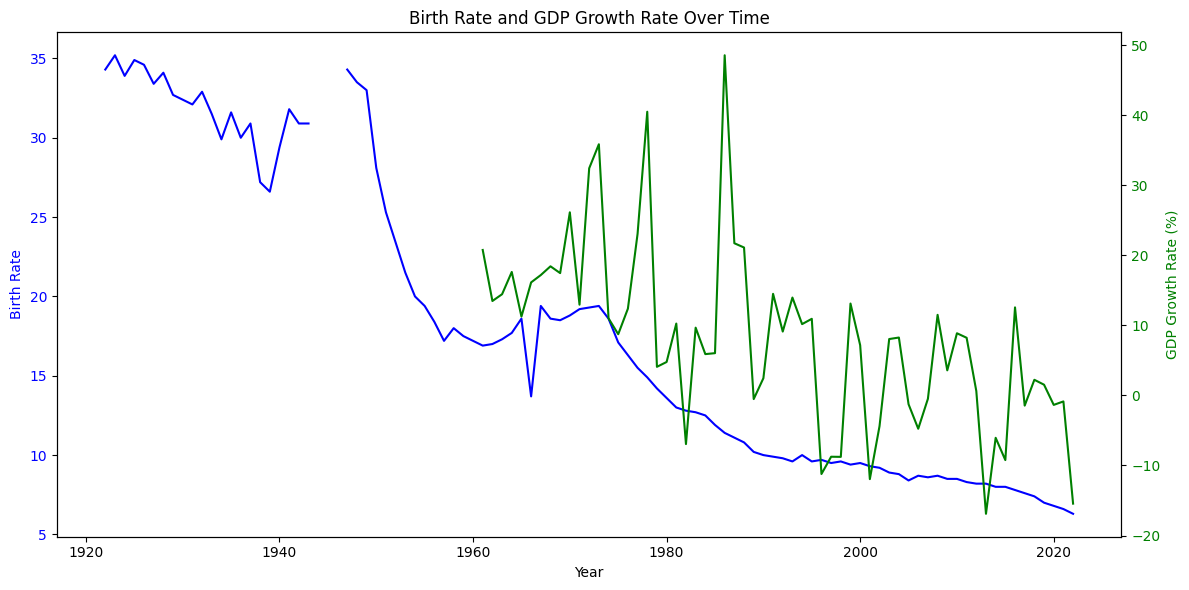

In [29]:
import matplotlib.pyplot as plt

# Creating a figure and a single subplot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting the birth rate on the primary y-axis
ax1.plot(merged_df['year'], merged_df['birth_rate'], color='blue', label='Birth Rate')
ax1.set_xlabel('Year')
ax1.set_ylabel('Birth Rate', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Creating a secondary y-axis for the GDP growth rate
ax2 = ax1.twinx()  
ax2.plot(merged_df['year'], merged_df['gdp_growth_rate'], color='green', label='GDP Growth Rate')
ax2.set_ylabel('GDP Growth Rate (%)', color='green')  
ax2.tick_params(axis='y', labelcolor='green')

# Adding a title and a legend
plt.title('Birth Rate and GDP Growth Rate Over Time')
fig.tight_layout()  
plt.show()

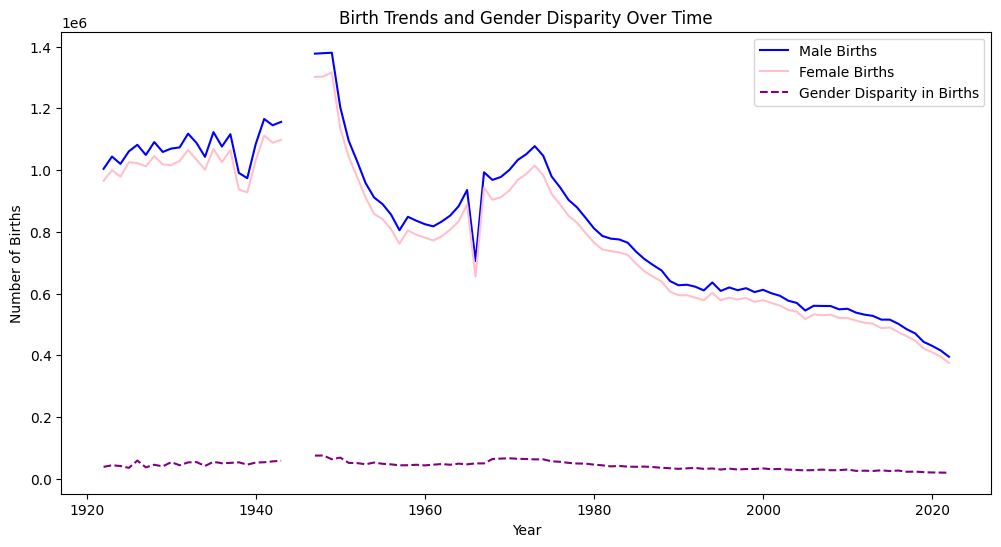

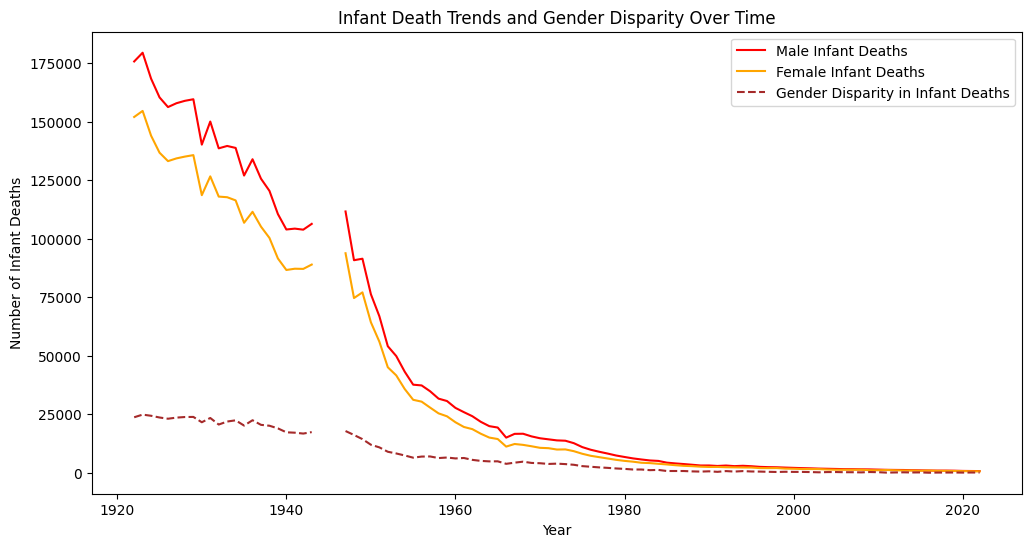

In [33]:
import matplotlib.pyplot as plt

# Plotting for births
plt.figure(figsize=(12, 6))
plt.plot(merged_df['year'], merged_df['birth_male'], label='Male Births', color='blue')
plt.plot(merged_df['year'], merged_df['birth_female'], label='Female Births', color='pink')
plt.plot(merged_df['year'], merged_df['gender_disparity_births'], label='Gender Disparity in Births', color='purple', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Number of Births')
plt.title('Birth Trends and Gender Disparity Over Time')
plt.legend()
plt.show()

# Plotting for infant deaths
plt.figure(figsize=(12, 6))
plt.plot(merged_df['year'], merged_df['infant_death_male'], label='Male Infant Deaths', color='red')
plt.plot(merged_df['year'], merged_df['infant_death_female'], label='Female Infant Deaths', color='orange')
plt.plot(merged_df['year'], merged_df['gender_disparity_deaths'], label='Gender Disparity in Infant Deaths', color='brown', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Number of Infant Deaths')
plt.title('Infant Death Trends and Gender Disparity Over Time')
plt.legend()
plt.show()

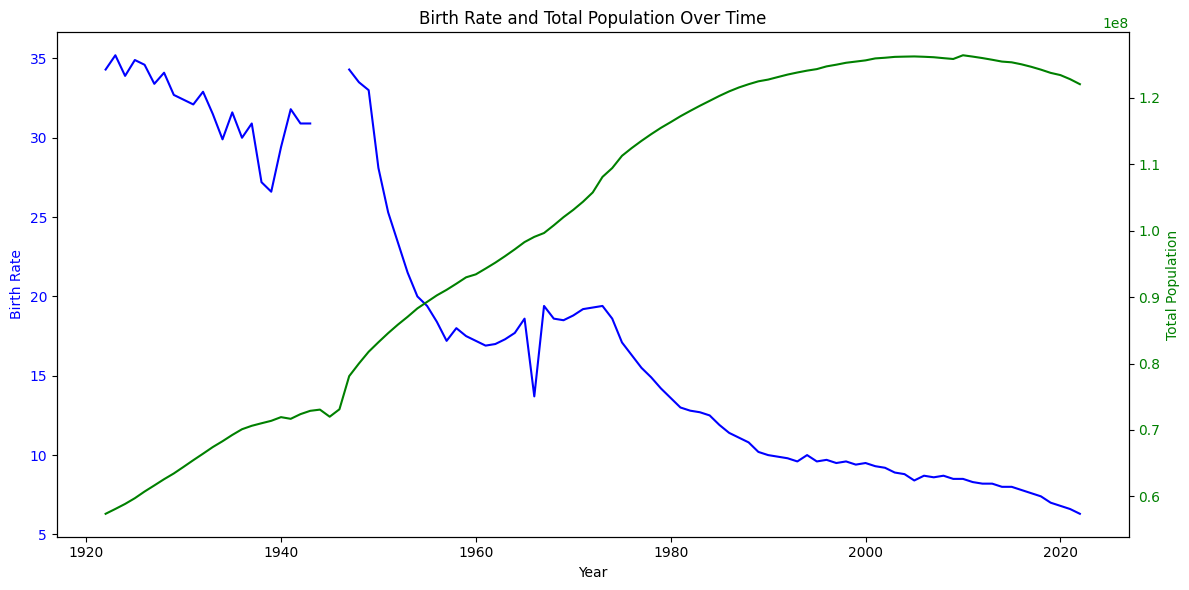

In [34]:
import matplotlib.pyplot as plt

# Creating a figure and a single subplot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting birth rate on the primary y-axis
ax1.plot(merged_df['year'], merged_df['birth_rate'], color='blue', label='Birth Rate')
ax1.set_xlabel('Year')
ax1.set_ylabel('Birth Rate', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Creating a secondary y-axis for the population
ax2 = ax1.twinx()  
ax2.plot(merged_df['year'], merged_df['population_total'], color='green', label='Total Population')
ax2.set_ylabel('Total Population', color='green')  
ax2.tick_params(axis='y', labelcolor='green')

# Adding a title and a legend
plt.title('Birth Rate and Total Population Over Time')
fig.tight_layout()  
plt.show()

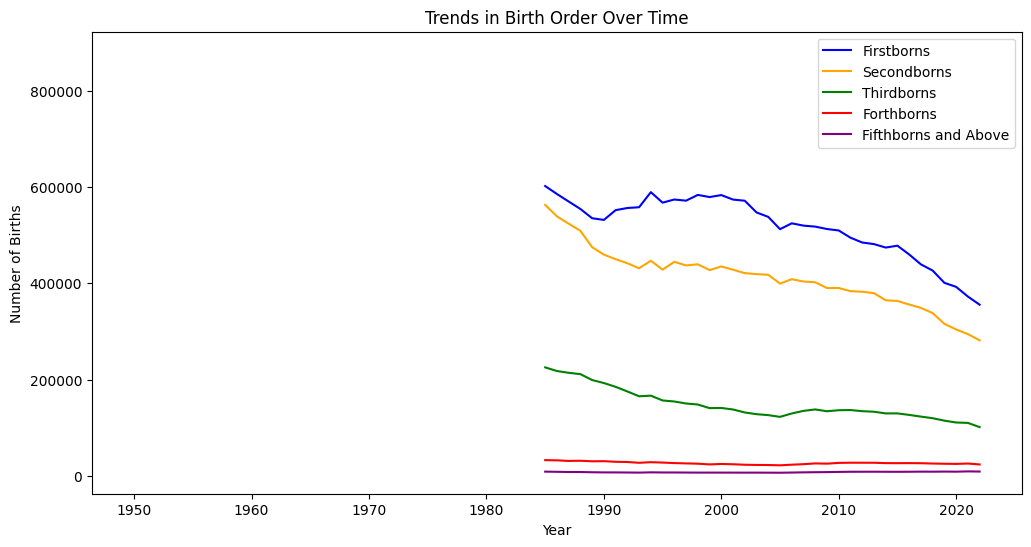

In [35]:
# Plotting for birth orders
plt.figure(figsize=(12, 6))
plt.plot(merged_df['year'], merged_df['firstborn'], label='Firstborns', color='blue')
plt.plot(merged_df['year'], merged_df['secondborn'], label='Secondborns', color='orange')
plt.plot(merged_df['year'], merged_df['thirdborn'], label='Thirdborns', color='green')
plt.plot(merged_df['year'], merged_df['forthborn'], label='Forthborns', color='red')
plt.plot(merged_df['year'], merged_df['fifthborn_and_above'], label='Fifthborns and Above', color='purple')
plt.xlabel('Year')
plt.ylabel('Number of Births')
plt.title('Trends in Birth Order Over Time')
plt.legend()
plt.show()

## Late 1970s:

- Japan experienced rapid economic growth in the post-World War II era, which lasted until the early 1970s. By the late 1970s, the economy began to stabilize and shift from high growth to a more mature, slower growth phase.
- The first oil shock in 1973 and the second in 1979 had significant impacts on the global economy, including Japan's. The economic uncertainty and inflation could have led to a decline in the birth rate as families might delay having children in such times.
- Japan's welfare and healthcare systems were improving, contributing to a lower infant mortality rate and potentially impacting the birth rate.

## 2010s:

- Japan faced a period of economic stagnation and deflation known as the "Lost Decades" starting in the 1990s, which extended into the 2010s. This long-term economic malaise could have affected birth rates as economic conditions are known to influence family planning decisions.
- The country's population has been aging rapidly, with a growing percentage of the population being elderly. This demographic shift could contribute to a lower birth rate and a changing population growth rate.
- The Great East Japan Earthquake and tsunami in March 2011, followed by the Fukushima Daiichi nuclear disaster, had profound social and economic impacts, which may have affected population trends in the short term.

## Late 1960s:

- The late 1960s was a period of high economic growth for Japan, during which the country became one of the world's largest economies.
- This period also saw a shift in societal values and the beginning of a decline in the birth rate as Japan became more urbanized and family planning became more prevalent.
- The introduction of the pill in the 1960s in other countries, and later in Japan, along with other family planning methods, could have contributed to changes in the birth rate.

## 1944-1946:

- This period covers the end of World War II. Japan experienced severe casualties and destruction of infrastructure, which drastically affected population growth.
- The immediate post-war era saw a significant drop in the birth rate due to the disruption of social and family structures, as well as economic hardship.
- Shortly after the war, there was a "baby boom" as soldiers returned home and the country began to rebuild, which led to a sharp increase in the birth rate and altered the population growth rate.


- For each of these periods, the mismatches between birth rate and population growth rate can be attributed to complex interactions between economic conditions, societal changes, government policies, and, in some cases, significant natural or man-made events. Each factor could have had a direct or indirect impact on family planning decisions, mortality rates, and migration patterns, influencing the overall demographic trends of Japan.

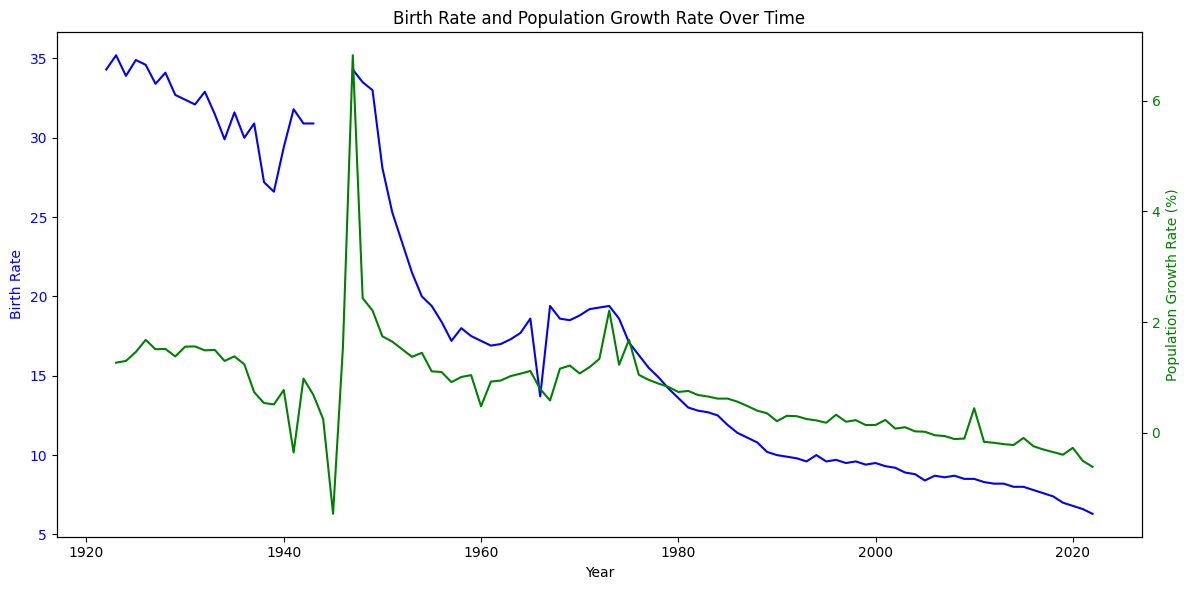

In [37]:
import matplotlib.pyplot as plt

# Creating a figure and a single subplot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting birth rate on the primary y-axis
ax1.plot(merged_df['year'], merged_df['birth_rate'], color='blue', label='Birth Rate')
ax1.set_xlabel('Year')
ax1.set_ylabel('Birth Rate', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Creating a secondary y-axis for the population growth rate
ax2 = ax1.twinx()  
ax2.plot(merged_df['year'], merged_df['population_growth_rate'], color='green', label='Population Growth Rate')
ax2.set_ylabel('Population Growth Rate (%)', color='green')  
ax2.tick_params(axis='y', labelcolor='green')

# Adding a title and a legend
plt.title('Birth Rate and Population Growth Rate Over Time')
fig.tight_layout()  
plt.show()

gdp                            1.000000
stillbirth_gender_ratio        0.974864
early_term_births_ratio        0.942827
year                           0.929168
mother_age_30-34_prop          0.907446
                                 ...   
birth_male                    -0.902464
stillbirth_total              -0.914107
total_fertility_rate          -0.921840
birth_rate                    -0.928717
infant_death_unknown_gender         NaN
Name: gdp, Length: 72, dtype: float64


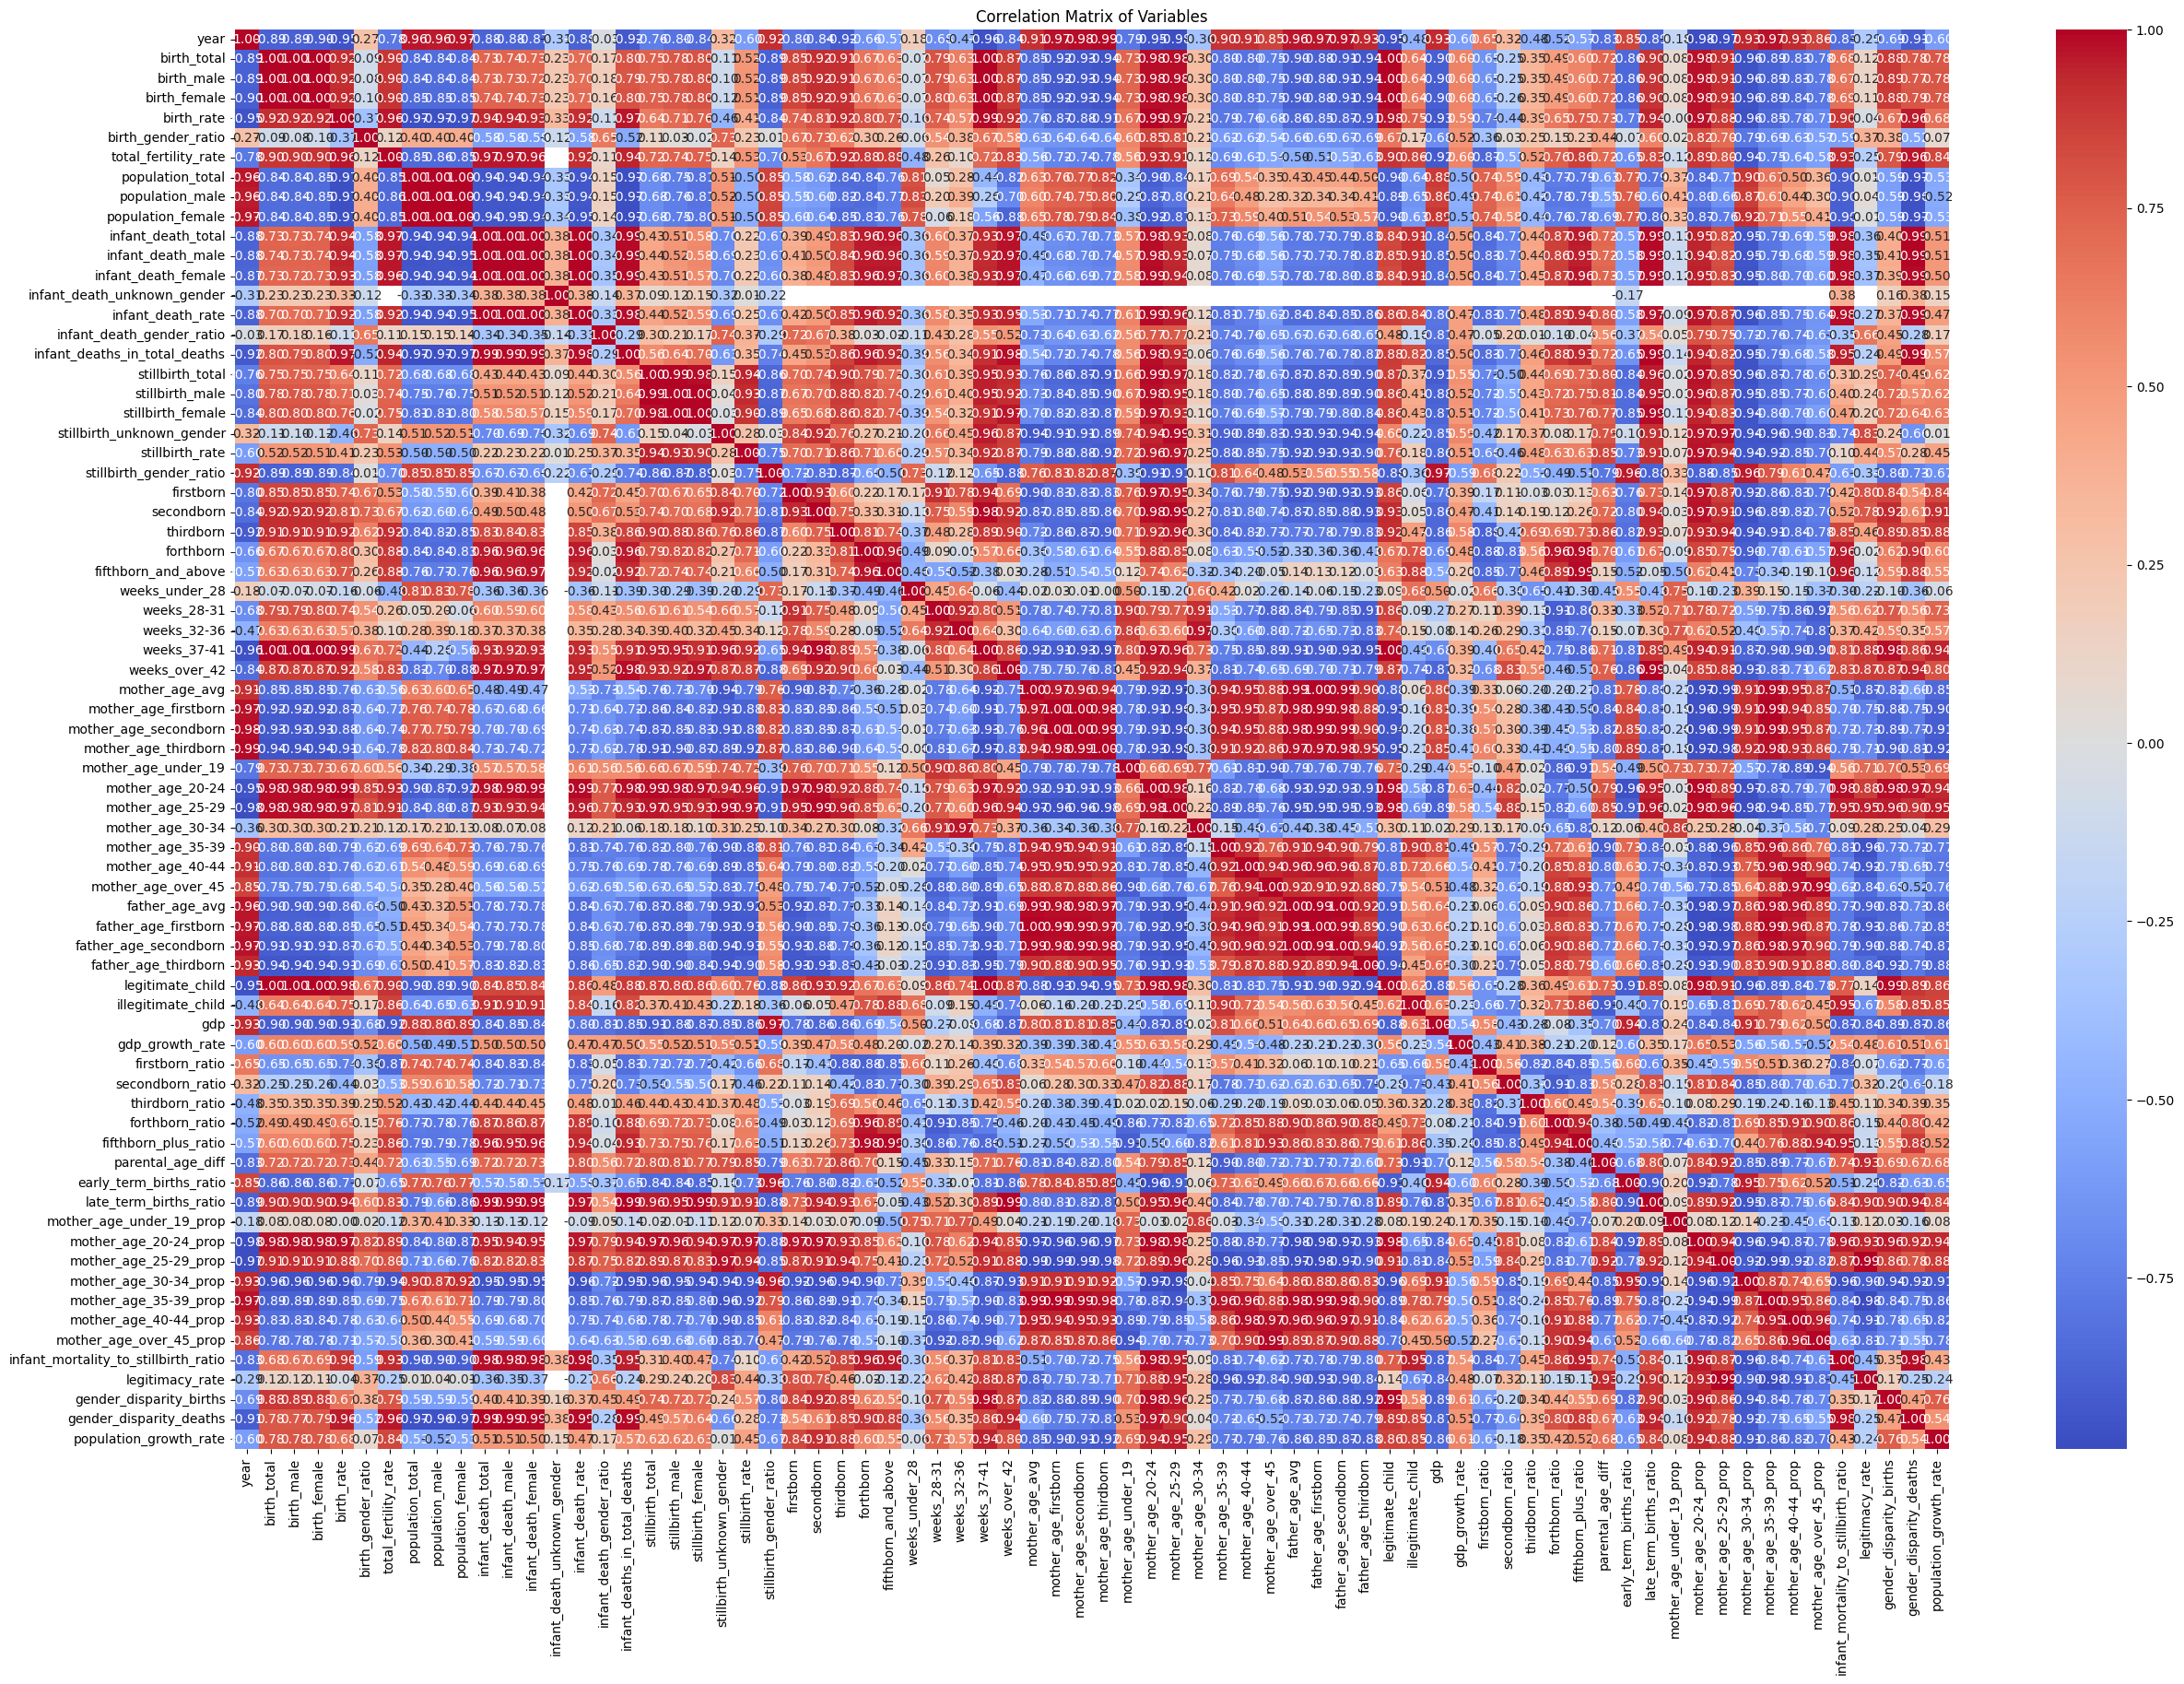

In [41]:
import seaborn as sns

# Compute the Pearson correlation matrix
correlation_matrix = merged_df.corr()

# Extract correlations of GDP with other variables
gdp_correlations = correlation_matrix['gdp'].sort_values(ascending=False)

# Print the correlations
print(gdp_correlations)

# Generating a heatmap
plt.figure(figsize=(30, 20))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Variables')
plt.show()


In [43]:
pd.DataFrame(gdp_correlations)

,gdp
gdp,1.000000
stillbirth_gender_ratio,0.974864
early_term_births_ratio,0.942827
year,0.929168
mother_age_30-34_prop,0.907446
...,...
birth_male,-0.902464
stillbirth_total,-0.914107
total_fertility_rate,-0.921840
birth_rate,-0.928717
